In [1]:
from typing import Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_150 = pd.read_csv('data/Exp_Door_DistinctSamples20_MaxSteps10000_Repi10_pop150.csv')
data_200 = pd.read_csv('data/Exp_Door_DistinctSamples20_MaxSteps10000_Repi10_pop200.csv')


In [5]:
df = pd.read_csv('data/OFAT_DistinctSamples20_MaxSteps10000_Repi10.csv')
data_100 = df[df['door_size'] > 0]

In [36]:
# plot together function
def plot_3pop(param,df100,df150,df200):
    plt.figure(figsize=(6,4),dpi=100)

    x1 = df100.groupby("door_size").mean().reset_index()["door_size"]
    y1 = df100.groupby("door_size").mean()[param]
    x2 = df150.groupby("door_size").mean().reset_index()["door_size"]
    y2 = df150.groupby("door_size").mean()[param]
    x3 = df200.groupby("door_size").mean().reset_index()["door_size"]
    y3 = df200.groupby("door_size").mean()[param]
    
    replicates1 = df100[param].count()
    replicates2 = df150[param].count()
    replicates3 = df200[param].count()

    err1 = (1.96 * df100[param].std()) / np.sqrt(replicates1)
    err2 = (1.96 * df150[param].std()) / np.sqrt(replicates2)
    err3 = (1.96 * df200[param].std()) / np.sqrt(replicates3)

    plt.plot(x1, y1, c='green',label = 'Pop = 100')
    plt.fill_between(x1, y1 - err1, y1 + err1,color='green',alpha=0.2)
    plt.plot(x2, y2, c='red',label = 'Pop = 150')
    plt.fill_between(x2, y2 - err2, y2 + err2,color='red',alpha=0.2)
    plt.plot(x3, y3, c='orange',label = 'Pop = 200')
    plt.fill_between(x3, y3 - err3, y3 + err3,color='orange',alpha=0.2)

    plt.xlabel('size of exit (m)', fontsize=14)
    if param == 'Evacuation time':
        plt.ylabel(f'{param} (s)', fontsize=14)
    elif param == 'Flow':
        plt.ylabel('Pedestrian Flow (m$^{-1}$s$^{-1}$)', fontsize=14)
    elif param == 'Evacuation percentage':
        plt.ylabel(f'{param} (%)', fontsize=14)
    else:
        plt.ylabel(param, fontsize=12)
    plt.legend(fontsize= 12)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

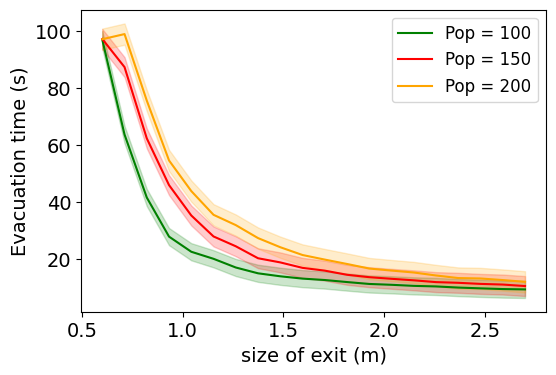

In [37]:
plot_3pop('Evacuation time',data_100,data_150,data_200)

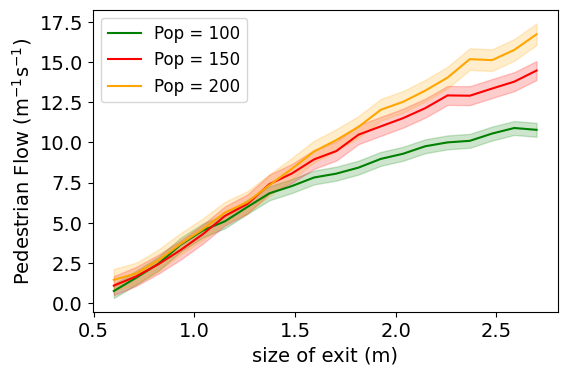

In [38]:
plot_3pop('Flow',data_100,data_150,data_200)

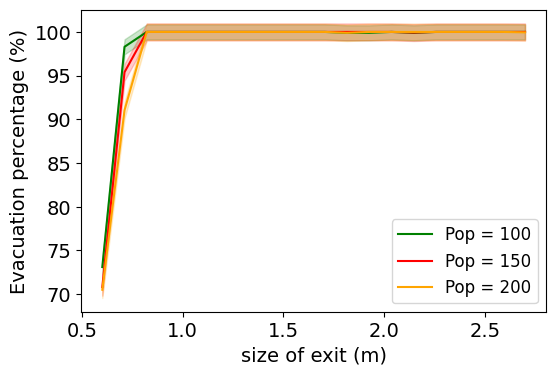

In [39]:
plot_3pop('Evacuation percentage',data_100,data_150,data_200)

In [8]:
# plot experiment strategy mixing
data_strategy = pd.read_csv('data/Exp_Prob_DistinctSamples6_MaxSteps10000_Repi5_Vision2_pop200.csv')
data = {}
data['prob_nearest'] = data_strategy

In [28]:
def plot_all_vars(data, param):
    """
    Plots the parameters passed vs each of the output variables.

    Args:
        data: dataframe that holds all data
        param: the parameter to be plotted
    """
    parameters = {
    'names': ['prob_nearest'],
    'bounds': [[0.5, 1.0]]
    }   
    var = parameters['names'][0]
    df = data[var]

    x = df.groupby(var).mean().reset_index()[var]
    y = df.groupby(var).mean()[param]

    replicates = df.groupby(var)[param].count()
    err = (1.96 * df.groupby(var)[param].std()) / np.sqrt(replicates)
    
    plt.figure(figsize=(6,4),dpi=100)
    plt.xlabel("Probability of 'Nearest Exit' %", fontsize=14)
    if param == 'Flow':
        plt.errorbar(x, y, yerr=err, fmt='o', color='darkgreen',
                ecolor='green', elinewidth=2, capsize=0)
        plt.ylabel('Pedestrian Flow (m$^{-1}$s$^{-1}$)', fontsize=14)
        plt.title("Strategy Mixing Experiment using Pedestrain Flow as Outcome", fontsize=12)
    elif param == 'Evacuation percentage':
        plt.errorbar(x, y, yerr=err, fmt='o', color='darkorange',
                ecolor='orange', elinewidth=2, capsize=0)
        plt.ylabel(f'{param} (%)', fontsize=14)
        plt.title("Strategy Mixing Experiment using Evacuation Precentage as Outcome", fontsize=12)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

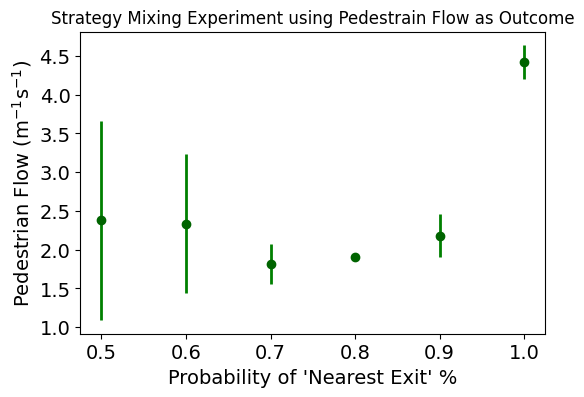

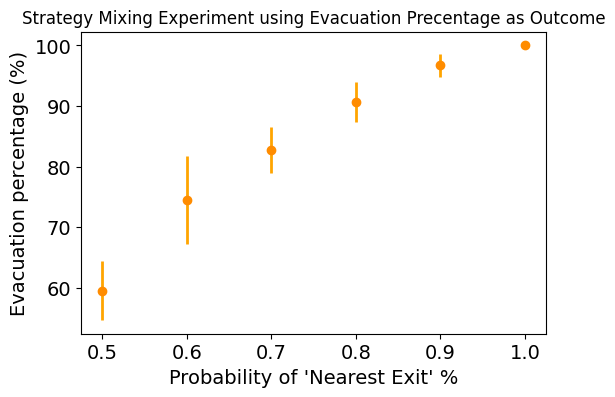

In [29]:
for param in ("Flow", "Evacuation percentage"):
        plot_all_vars(data, param)
        plt.show()